# Лабораторная работа 1#

# Сделал: Окунев Никита #

# Группа: 18ивт-2 #

# Вариант:2 #

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [47]:
flights_df = pd.read_csv ('flights.csv', nrows=1000000)
print("flights")
print(flights_df.head())

flights
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            LAX                 PBI                   10      ...         
2            SFO                 CLT                   20      ...         
3            LAX                 MIA                   20      ...         
4            SEA                 ANC                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0  

In [24]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,960842.000000,960842.000000,960145.000000,960145.000000,...,1000000.000000,959117.000000,957394.000000,1000000.000000,1000000.000000,221041.000000,221041.000000,221041.000000,221041.000000,221041.000000
mean,2015.0,1.630873,14.087290,3.942253,2259.305292,1322.605368,1333.892931,11.525092,16.735891,1357.706468,...,1505.500062,1492.772831,7.904573,0.002474,0.040132,13.879651,0.057921,18.040721,22.955108,3.631589
std,0.0,0.659208,8.846599,1.957458,1799.970834,470.183312,482.295869,39.451588,10.204402,482.567175,...,485.664098,506.662151,42.383991,0.049678,0.196269,25.747212,1.803159,46.037156,41.895492,23.792253
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-61.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,6.000000,2.000000,756.000000,920.000000,929.000000,-5.000000,11.000000,944.000000,...,1121.000000,1116.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,2.000000,14.000000,4.000000,1727.000000,1320.000000,1329.000000,-1.000000,14.000000,1343.000000,...,1525.000000,1522.000000,-3.000000,0.000000,0.000000,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,2.000000,22.000000,6.000000,3488.000000,1720.000000,1731.000000,11.000000,19.000000,1745.000000,...,1915.000000,1917.000000,12.000000,0.000000,0.000000,19.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,3.000000,31.000000,7.000000,9794.000000,2359.000000,2400.000000,1988.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,1313.000000,1152.000000


### 1) Подсчитайте количество отмененных рейсов

In [25]:
print("Отменённые рейсы =",flights_df[flights_df['CANCELLED']==1].shape[0])

Отменённые рейсы = 40132


### 2) Определите аэропорт, рейсы для которого отменяются наиболее часто

In [26]:
count = flights_df.groupby(["ORIGIN_AIRPORT"])[["CANCELLED"]].count()
print ("Аэропорт, рейсы для которого отменяются наиболее часто", count.sort_values(['CANCELLED'],ascending=False).head(1))

Аэропорт, рейсы для которого отменяются наиболее часто                 CANCELLED
ORIGIN_AIRPORT           
ATL                 63413


### 3) Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков

In [27]:
Pearson_day = pearsonr(flights_df["CANCELLED"],flights_df["DAY_OF_WEEK"])
Spearman_day = spearmanr(flights_df["CANCELLED"],flights_df["DAY_OF_WEEK"])

print("День недели")
print("Коэффициент корреляции Пирсона: ",Pearson_day)
print("Коэффициент корреляции Спирмена: ",Spearman_day)
                          
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

День недели
Коэффициент корреляции Пирсона:  (-0.03462500824415702, 7.4235727640661773e-263)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.035746328621575174, pvalue=5.020553437595337e-280)
p-value is good


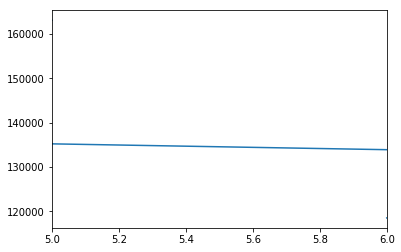

In [53]:
flights_df["DAY_OF_WEEK"].value_counts().plot()

In [29]:
Pearson_month = pearsonr(flights_df["CANCELLED"],flights_df["MONTH"])
Spearman_month = spearmanr(flights_df["CANCELLED"],flights_df["MONTH"])

print("Месяц")
print("Коэффициент корреляции Пирсона: ",Pearson_month)
print("Коэффициент корреляции Спирмена: ",Spearman_month)
      
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Месяц
Коэффициент корреляции Пирсона:  (0.080883133333056731, 0.0)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=0.078987431268844777, pvalue=0.0)
p-value is good


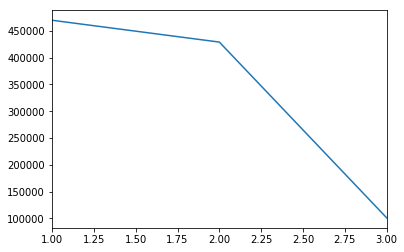

In [30]:
flights_df["MONTH"].value_counts().plot()

In [31]:
label_encoder = LabelEncoder()
airlines = pd.Series(label_encoder.fit_transform(flights_df["AIRLINE"]))

Pearson_airlines = pearsonr(flights_df["CANCELLED"],airlines)
Spearman_airlines = spearmanr(flights_df["CANCELLED"],airlines)

print("Авиакомпания")
print("Коэффициент корреляции Пирсона: ",Pearson_airlines)
print("Коэффициент корреляции Спирмена: ",Spearman_airlines)
      
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Авиакомпания
Коэффициент корреляции Пирсона:  (-0.0164406196153562, 9.6166461386136889e-61)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.016110450084979345, pvalue=2.1190667409249646e-58)
p-value is good


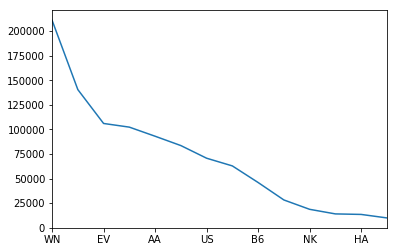

In [32]:
flights_df["AIRLINE"].value_counts().plot()

In [33]:
airport = pd.Series(label_encoder.fit_transform(flights_df["ORIGIN_AIRPORT"]))

Pearson_airport = pearsonr(flights_df["CANCELLED"], airport)
Spearman_airport = spearmanr(flights_df["CANCELLED"], airport)

print("Аэропорт")
print("Коэффициент корреляции Пирсона: ",Pearson_airport)
print("Коэффициент корреляции Спирмена: ",Spearman_airport)
       
if (Spearman_day[1] < 0.05):
    print("p-value is good")
else:
    print("p-value is not good")

Аэропорт
Коэффициент корреляции Пирсона:  (-0.028754583398742577, 6.6958215093350677e-182)
Коэффициент корреляции Спирмена:  SpearmanrResult(correlation=-0.027344950266289834, pvalue=1.0790116605366485e-164)
p-value is good


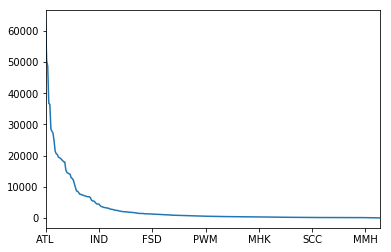

In [34]:
flights_df["ORIGIN_AIRPORT"].value_counts().plot()

### 4) Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов

In [35]:
print("Количество рейсов = NK ", flights_df[flights_df["AIRLINE"] == "NK"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = NK ", flights_df[(flights_df["AIRLINE"] == "NK") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = NK ", flights_df[(flights_df["AIRLINE"] == "NK") & (flights_df['DIVERTED'] == 1)].shape[0]-1)

Количество рейсов = NK  18698
Количество отменённых рейсов = NK  460
Количество перенаправленных рейсов = NK  24


In [36]:
print("Количество рейсов = UA ", flights_df[flights_df["AIRLINE"] == "UA"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = UA ", flights_df[(flights_df["AIRLINE"] == "UA") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = UA ", flights_df[(flights_df["AIRLINE"] == "UA") & (flights_df["DIVERTED"] == 1)].shape[0]-1)

Количество рейсов = UA  83514
Количество отменённых рейсов = UA  2383
Количество перенаправленных рейсов = UA  158


In [37]:
print("Количество рейсов = DL ", flights_df[flights_df["AIRLINE"]=="DL"]["FLIGHT_NUMBER"].shape[0]-1)
print("Количество отменённых рейсов = DL ", flights_df[(flights_df["AIRLINE"] == "DL") & (flights_df["CANCELLED"] == 1)].shape[0]-1)
print("Количество перенаправленных рейсов = DL ", flights_df[(flights_df["AIRLINE"] == "DL") & (flights_df["DIVERTED"] == 1)].shape[0]-1)

Количество рейсов = DL  140423
Количество отменённых рейсов = DL  2858
Количество перенаправленных рейсов = DL  244


### 5) Определите скорость полёта для каждого рейса, скорость полёта среднюю для трёх выбранных авиакомпаний

In [38]:
flights_df['FLIGHT_SPEED'] = flights_df['DISTANCE']/flights_df['AIR_TIME']
speed_df = flights_df[['AIRLINE', 'FLIGHT_SPEED']]
speed_df

,AIRLINE,FLIGHT_SPEED
0,AS,8.568047
1,AA,8.859316
2,US,8.631579
3,AA,9.077519
4,AS,7.276382
5,DL,7.713592
6,NK,8.435065
7,US,9.320175
8,AA,8.462428
9,DL,9.392473


In [39]:
avg_df = speed_df.groupby(['AIRLINE'])['FLIGHT_SPEED'].mean()
avg_df.head(3)

AIRLINE
AA    7.185435
AS    7.196521
B6    6.943511
Name: FLIGHT_SPEED, dtype: float64

### 6) Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс (для двух аэропортов)

In [40]:
flights_df = pd.read_csv ('flights.csv',nrows=100000)
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


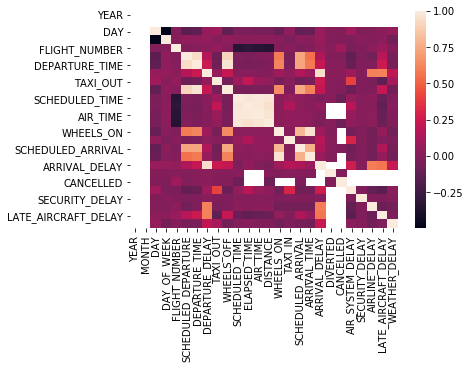

In [41]:
sns.heatmap(flights_df.corr());

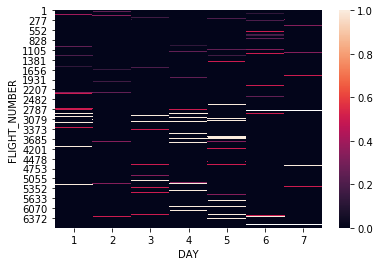

In [42]:
flights_df[flights_df['ORIGIN_AIRPORT']=='ORD']
flights_df = flights_df.pivot_table(values="CANCELLED", index="FLIGHT_NUMBER", columns="DAY")
sns.heatmap(flights_df);

### 7) Визуализируйте время задержки отправки и прибытия по трём аэропортам

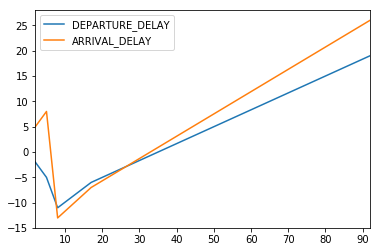

In [48]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "SFO"]
SFO = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()

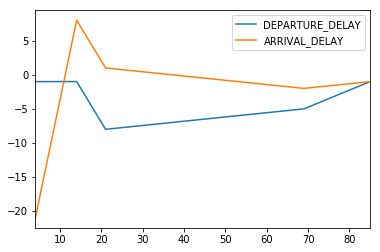

In [49]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "SEA"]
SEA = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()

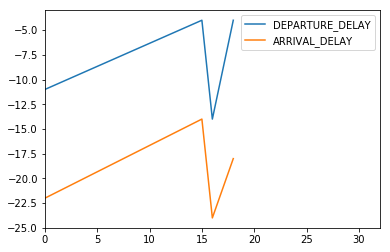

In [50]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "ANC"]
ANC = time[["DEPARTURE_DELAY" , "ARRIVAL_DELAY"]].head().plot()

### 8) Определите для трёх выбранных аэропортов и визуализируйте задержки по каждой причине


B    210
C     14
A     10
Name: CANCELLATION_REASON, dtype: int64


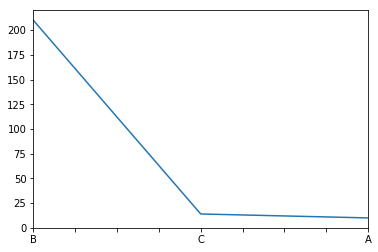

In [51]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "PBI"]
reason = time["CANCELLATION_REASON"].value_counts()
print(reason)
reason.plot()

In [14]:
flights_df = pd.read_csv ('flights.csv', nrows=1000000)
print("flights")
print(flights_df.head())

flights
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            LAX                 PBI                   10      ...         
2            SFO                 CLT                   20      ...         
3            LAX                 MIA                   20      ...         
4            SEA                 ANC                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0  

B    210
C     14
A     10
Name: CANCELLATION_REASON, dtype: int64


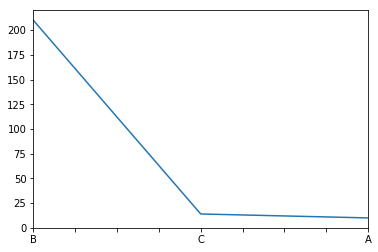

In [52]:
time = flights_df[flights_df["ORIGIN_AIRPORT"] == "PBI"]
reason = time["CANCELLATION_REASON"].value_counts()
print(reason)
reason.plot()

### 9) Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию

In [17]:
max_arrival = flights_df.groupby(['AIRLINE'])[['ARRIVAL_DELAY']].max()
max_arrival = max_arrival.sort_values(by=['ARRIVAL_DELAY'], ascending=False)

In [18]:
print('Максимальная задержка по прибытию:')
max_arrival.head(1)

Максимальная задержка по прибытию:


,ARRIVAL_DELAY
AIRLINE,
AA,1971.0


In [20]:
max_departure = flights_df.groupby(['AIRLINE'])[['DEPARTURE_DELAY']].max()
max_departure = max_departure.sort_values(by=['DEPARTURE_DELAY'], ascending=False)

In [21]:
print('Максимальная задержка по отправке:')
max_departure.head(1)

Максимальная задержка по отправке:


,DEPARTURE_DELAY
AIRLINE,
AA,1988.0
